<a href="https://colab.research.google.com/github/nazaninbondarian/MachineLearning2024/blob/main/Midterm%5CQ4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd ..

In [ ]:
import os

# Define the folder name
folder_name = "Data"

# Check if the folder already exists, and create it if not
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Commented out IPython magic to ensure Python compatibility.
%cd Data

/content/Data


In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1mg0r1LM3xyEHNJGw90voOALm1JUUemQG

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From (original): https://drive.google.com/uc?id=1mg0r1LM3xyEHNJGw90voOALm1JUUemQG
From (redirected): https://drive.google.com/uc?id=1mg0r1LM3xyEHNJGw90voOALm1JUUemQG&confirm=t&uuid=411a4651-d807-427d-b514-2bd56450743c
To: /content/Data/DATA.mat
100% 2.91M/2.91M [00:00<00:00, 81.7MB/s]


In [ ]:
!pip install scipy pandas
import scipy.io
import pandas as pd
import numpy as np

In [ ]:
# Load the .mat file
data = scipy.io.loadmat('/content/Data/DATA.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'NOV17', 'NOV9'])


In [ ]:
# Assuming the .mat file contains a dictionary where one of the entries is the data array
Train = data['NOV9']
Test = data['NOV17']
columns = [f'Feature_{i+1}' for i in range(17)]
df_train = pd.DataFrame(Train, columns=columns)

# Display the DataFrame
print("Train:",df_train.head())

df_test = pd.DataFrame(Test, columns=columns)

# Display the DataFrame
print("Test:",df_test.head())

Train:    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0        0.0      699.1      300.6       97.8      296.2       42.7   
1        1.0      697.7      298.9       97.8      295.4       41.8   
2        2.0      696.2      301.8       97.8      295.4       42.9   
3        3.0      702.8      300.9       97.7      295.1       43.1   
4        4.0      701.3      292.6       97.8      294.6       42.6   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0       42.0       46.1      129.1       133.4        12.2        26.4   
1       41.6       45.3      129.1       133.3        12.2        26.4   
2       41.4       46.6      129.1       133.4        12.2        26.3   
3       41.5       46.0      129.1       133.4        12.2        26.2   
4       42.3       47.0      129.1       133.4        12.2        26.1   

   Feature_13  Feature_14  Feature_15  Feature_16  Feature_17  
0        53.0       242.0       136.9       164.0       1

In [ ]:
print(df_train.isnull().sum())

Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
dtype: int64


In [ ]:
print(df_test.isnull().sum())

Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
dtype: int64


In [ ]:
Train_Fault1 = df_train.iloc[57275 : 57550]
Train_Fault2 = df_train.iloc[58830 : 58930]
Train_Fault3 = df_train.iloc[58520 : 58625]
Train_Fault0 = df_train.iloc[58800 : 59800]
Train_Fault = pd.concat([Train_Fault1, Train_Fault2, Train_Fault3, Train_Fault0])
Train_Fault = Train_Fault.drop(columns=['Feature_1'], axis=1)

print(Train_Fault)


       Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Feature_7  \
57275      649.3      359.5       96.8      362.9       34.8       32.9   
57276      650.1      352.6       96.8      363.0       34.6       33.6   
57277      648.6      361.2       96.9      364.5       34.9       33.5   
57278      646.9      357.8       96.9      365.1       35.3       32.8   
57279      641.3      361.9       96.8      365.9       35.3       33.2   
...          ...        ...        ...        ...        ...        ...   
59795      621.0      376.1       96.4      374.4       32.1       32.0   
59796      620.3      373.9       96.4      378.1       32.6       31.2   
59797      627.4      382.9       96.3      380.1       33.0       30.9   
59798      633.5      371.7       96.3      378.4       33.2       32.5   
59799      633.2      368.0       96.4      374.0       33.3       31.8   

       Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  Feature_13  \
57275       46.5    

In [ ]:
df_partial_train = df_train.copy()
Train_Normal = df_partial_train.drop(Train_Fault.index, inplace=False)
Train_Normal = Train_Normal.drop(columns=['Feature_1'], axis=1)

print(Train_Normal)

       Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Feature_7  \
0          699.1      300.6       97.8      296.2       42.7       42.0   
1          697.7      298.9       97.8      295.4       41.8       41.6   
2          696.2      301.8       97.8      295.4       42.9       41.4   
3          702.8      300.9       97.7      295.1       43.1       41.5   
4          701.3      292.6       97.8      294.6       42.6       42.3   
...          ...        ...        ...        ...        ...        ...   
86395      598.8      373.1       97.0      379.9       31.4       30.0   
86396      601.5      365.6       97.0      378.9       30.7       30.7   
86397      597.8      374.8       97.0      378.5       30.1       30.5   
86398      593.7      379.7       97.0      378.8       30.3       30.3   
86399      582.7      377.8       97.0      380.3       29.8       30.5   

       Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  Feature_13  \
0           46.1    

In [ ]:
Test_Fault1 = df_test.iloc[54600 : 54700]
Test_Fault2 = df_test.iloc[56670 : 56770]

Test_Fault = pd.concat([Test_Fault1, Test_Fault2])
Test_Fault = Test_Fault.drop(columns=['Feature_1'], axis=1)
print(Test_Fault)

       Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Feature_7  \
54600      503.5      413.2       97.4      404.4       32.1       31.9   
54601      498.4      410.3       97.5      404.9       32.6       30.1   
54602      501.8      409.8       97.5      405.3       33.1       31.7   
54603      504.3      411.7       97.5      405.4       33.8       31.8   
54604      506.2      405.6       97.5      405.0       33.9       32.9   
...          ...        ...        ...        ...        ...        ...   
56765      777.3      274.0       97.1      241.0       64.1       52.6   
56766      780.7      266.2       97.1      238.2       63.3       52.9   
56767      784.9      266.7       97.1      234.2       63.2       53.8   
56768      785.8      261.1       97.1      230.5       62.7       55.6   
56769      789.7      260.1       97.1      227.8       62.5       55.2   

       Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  Feature_13  \
54600       46.4    

In [294]:
df_partial_test = df_test.copy()
Test_Normal = df_partial_test.drop(Test_Fault.index, inplace=False)
Test_Normal = Test_Normal.drop(columns=['Feature_1'], axis=1)

print(Test_Normal)

       Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Feature_7  \
0          642.0      359.0       97.4      351.3       33.9       33.1   
1          635.9      356.8       97.4      352.6       35.0       32.9   
2          638.8      356.0       97.4      353.4       33.9       34.0   
3          637.6      350.7       97.4      354.1       34.4       33.3   
4          635.7      360.4       97.4      354.3       33.7       33.3   
...          ...        ...        ...        ...        ...        ...   
86395      661.1      383.6       96.0      367.9       34.0       32.9   
86396      669.6      363.4       96.0      366.1       33.8       32.7   
86397      664.2      372.6       96.0      363.0       34.4       32.9   
86398      670.3      362.9       96.0      361.5       33.9       32.9   
86399      665.9      363.1       96.0      361.1       34.2       34.4   

       Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  Feature_13  \
0           47.6    

In [295]:
# Convert lists of samples to numpy arrays
Train_Normal_samples = np.array(Train_Normal)
Test_Normal_samples = np.array(Test_Normal)

Train_fault_samples = np.array(Train_Fault)
Test_fault_samples = np.array(Test_Fault)
Train_Normal_samples.shape, Test_Normal_samples.shape, Train_fault_samples.shape, Test_fault_samples.shape

((85020, 16), (86200, 16), (1480, 16), (200, 16))

In [296]:
# Create labels for the samples
Normal_train_labels = np.ones((Train_Normal_samples.shape[0], 1))  # Assuming class Normal is labeled as 1
Fault_train_labels = np.zeros((Train_fault_samples.shape[0], 1))  # Assuming class Fault  is labeled as 0

Normal_test_labels = np.ones((Test_Normal_samples.shape[0], 1))  # Assuming class Normal is labeled as 1
Fault_test_labels = np.zeros((Test_fault_samples.shape[0], 1))  # Assuming class Fault  is labeled as 0

In [297]:
# Concatenate the data both classes
train_matrix = np.vstack((Train_Normal_samples, Train_fault_samples))
# Concatenate the data both classes
test_matrix = np.vstack((Test_Normal_samples, Test_fault_samples))


In [298]:
label_train = np.vstack((Normal_train_labels,Fault_train_labels))
label_test = np.vstack((Normal_test_labels,Fault_test_labels))


In [299]:
from imblearn.under_sampling import RandomUnderSampler
# Count the number of samples in each class
unique, counts = np.unique(label_train, return_counts=True)
print("Class counts before balancing:", dict(zip(unique, counts)))
# Use RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=76)
X_resampled_train, y_resampled_train = rus.fit_resample(train_matrix, label_train)

# Count the number of samples in each class after balancing
unique_resampled, counts_resampled = np.unique(y_resampled_train, return_counts=True)
print("Class counts after balancing:", dict(zip(unique_resampled, counts_resampled)))
print('\n')
print("New balanced dataset shape:", X_resampled_train.shape, y_resampled_train.shape)

Class counts before balancing: {0.0: 1480, 1.0: 85020}
Class counts after balancing: {0.0: 1480, 1.0: 1480}


New balanced dataset shape: (2960, 16) (2960,)


In [308]:
from imblearn.under_sampling import RandomUnderSampler
# Count the number of samples in each class
unique, counts = np.unique(label_test, return_counts=True)
print("Class counts before balancing:", dict(zip(unique, counts)))
# Use RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=76)
X_resampled_test, y_resampled_test = rus.fit_resample(test_matrix, label_test)

# Count the number of samples in each class after balancing
unique_resampled, counts_resampled = np.unique(y_resampled_test, return_counts=True)
print("Class counts after balancing:", dict(zip(unique_resampled, counts_resampled)))
print('\n')
print("New balanced dataset shape:", X_resampled_test.shape, y_resampled_test.shape)

Class counts before balancing: {0.0: 200, 1.0: 86200}
Class counts after balancing: {0.0: 200, 1.0: 200}


New balanced dataset shape: (400, 16) (400,)


In [309]:
data_matrix = np.vstack((X_resampled_train, X_resampled_test))
labels = np.vstack((y_resampled_train.reshape(2960,1),y_resampled_test.reshape(400,1)))

In [310]:
# Concatenate the data and labels for both classes
main_matrix = np.hstack((data_matrix, labels))
main_matrix

array([[649.3, 359.5,  96.8, ..., 168.8, 133. ,   0. ],
       [650.1, 352.6,  96.8, ..., 168.9, 133. ,   0. ],
       [648.6, 361.2,  96.9, ..., 168.7, 133. ,   0. ],
       ...,
       [644.4, 384.6,  96. , ..., 169.3, 133.5,   1. ],
       [610.3, 383.4,  97.6, ..., 176.5, 134.2,   1. ],
       [643. , 373.6,  96.3, ..., 162.1, 132.3,   1. ]])

In [312]:
main_matrix.shape

(3360, 17)

In [313]:
# Calculate Standard Deviation of each feature
std_dev_values = np.std(data_matrix, axis=1)
# Calculate Peak of each feature
peak_values = np.max(np.abs(data_matrix),axis=1)
# Calculate Crest Factor of each feature
crest_factor_values = np.max(np.abs(data_matrix),axis=1) / np.sqrt(np.mean(data_matrix**2, axis=1))
# Calculate Peak to Peak of each feature
peak_to_peak_values = np.max(data_matrix, axis=1)-np.min(data_matrix, axis=1)
# Calculate Shape Factor of each feature
shape_factor_values = np.sqrt(np.mean(data_matrix**2, axis=1))/np.mean(np.abs(data_matrix), axis=1)
# Calculate Mean of each feature
mean_values = np.mean(data_matrix, axis=1)
# Calculate Root Mean Square of each feature
rms_values = np.sqrt(np.mean(data_matrix**2, axis=1))
# Calculate Absolute Mean of each feature
absolute_mean_values = np.mean(np.abs(data_matrix), axis=1)
# Calculate Impulse Factor of each feature
impulse_factor_values = np.abs(np.max(data_matrix,axis=1))/np.mean(np.abs(data_matrix), axis=1)

In [314]:
# Concatenate features selection Matrix
features = np.column_stack((std_dev_values, peak_values, crest_factor_values, peak_to_peak_values, shape_factor_values,mean_values, absolute_mean_values,rms_values, impulse_factor_values))
features.shape

(3360, 9)

In [315]:
# Create DataFrame
Data = pd.DataFrame(features, columns=['Standard Deviation','Peak', 'Crest Factor', 'Peak to Peak','Shape Factor', 'Mean', 'Absolute Mean', 'RMS', 'Impulse Factor'])
Data

,Standard Deviation,Peak,Crest Factor,Peak to Peak,Shape Factor,Mean,Absolute Mean,RMS,Impulse Factor
0,164.580964,649.3,2.776286,636.1,1.407499,166.16250,166.16250,233.873620,3.907621
1,164.298954,650.1,2.786461,636.9,1.408485,165.64375,165.64375,233.306661,3.924688
2,164.623368,648.6,2.770676,635.4,1.406553,166.43125,166.43125,234.094456,3.897105
3,164.130940,646.9,2.770088,633.7,1.405752,166.12500,166.12500,233.530472,3.894056
4,163.498640,641.3,2.752233,628.1,1.403521,166.01875,166.01875,233.010795,3.862817
...,...,...,...,...,...,...,...,...,...
3355,159.559403,624.7,2.728525,612.2,1.394398,164.19375,164.19375,228.951503,3.804652
3356,165.845472,648.4,2.747531,634.9,1.405613,167.89375,167.89375,235.993712,3.861966
3357,166.025656,644.4,2.725677,631.0,1.404639,168.31250,168.31250,236.418308,3.828593
3358,160.831284,610.3,2.630026,597.6,1.387242,167.27500,167.27500,232.050916,3.648483


<ipython-input-316-484c9a911f00>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Standard Deviation'], color="red").set_title('Standard Deviation')
<ipython-input-316-484c9a911f00>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Peak'], color="green").set_title('Peak')
<ipython-inp

Text(0.5, 1.0, 'Impulse Factor')

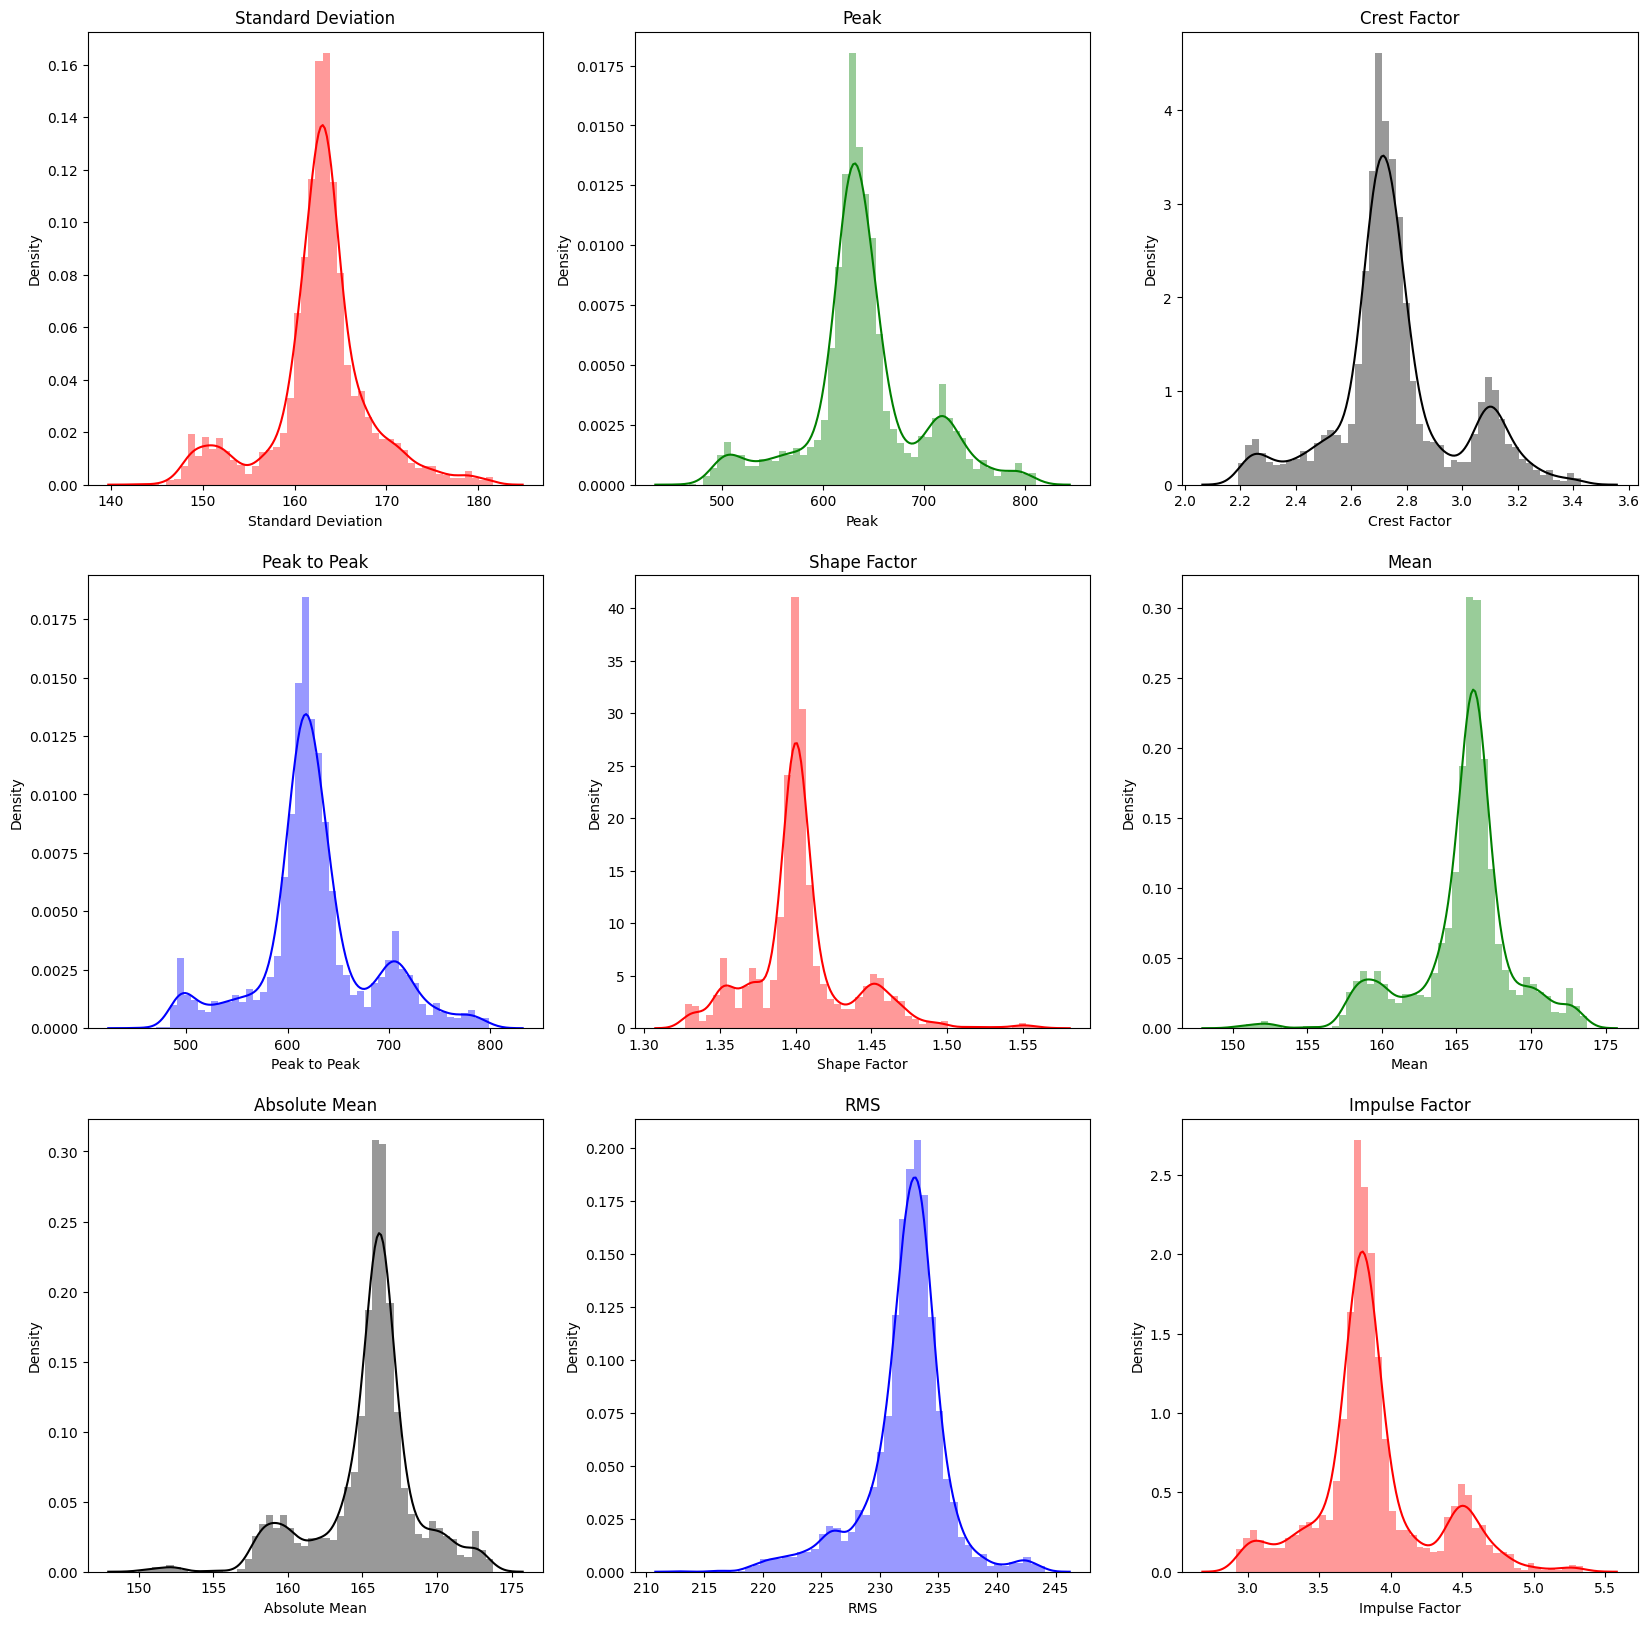

In [316]:
# Create a 3x3 grid of subplots for various numerical variables
import seaborn as sns
plt.figure(figsize=(20, 20))

plt.subplot(3,3,1)
sns.distplot(Data['Standard Deviation'], color="red").set_title('Standard Deviation')

plt.subplot(3,3,2)
sns.distplot(Data['Peak'], color="green").set_title('Peak')

plt.subplot(3,3,3)
sns.distplot(Data['Crest Factor'], color="black").set_title('Crest Factor')

plt.subplot(3,3,4)
sns.distplot(Data['Peak to Peak'], color="blue").set_title('Peak to Peak')

plt.subplot(3,3,5)
sns.distplot(Data['Shape Factor'], color="red").set_title('Shape Factor')

plt.subplot(3,3,6)
sns.distplot(Data['Mean'], color="green").set_title('Mean')

plt.subplot(3,3,7)
sns.distplot(Data['Absolute Mean'], color="black").set_title('Absolute Mean')

plt.subplot(3,3,8)
sns.distplot(Data['RMS'], color="blue").set_title('RMS')

plt.subplot(3,3,9)
sns.distplot(Data['Impulse Factor'], color="red").set_title('Impulse Factor')

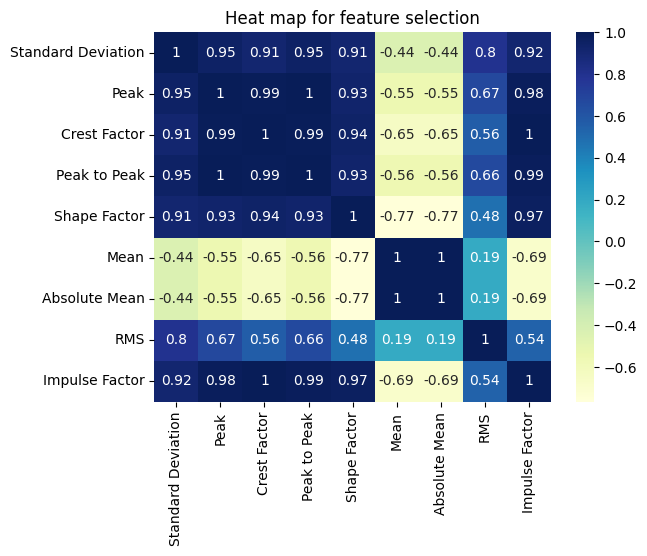

In [319]:
import matplotlib.pyplot as plt
sns.heatmap(Data.corr(), annot=True, cmap="YlGnBu")
plt.title('Heat map for feature selection')
plt.show()

In [320]:
X_train=features[0:2960,:]
X_test=features[2961:,:]
y_train=labels[0:2960,:]
y_test=labels[2961:,:]

In [318]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
print(X_train[:5])
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:5])

[[164.58096364 649.3          2.77628576 636.1          1.4074994
  166.1625     166.1625     233.87361972   3.90762055]
 [164.29895377 650.1          2.78646138 636.9          1.40848454
  165.64375    165.64375    233.30666112   3.92468777]
 [164.62336832 648.6          2.77067646 635.4          1.40655349
  166.43125    166.43125    234.0944561    3.89710466]
 [164.13094049 646.9          2.77008818 633.7          1.40575152
  166.125      166.125      233.53047178   3.89405568]
 [163.49863997 641.3          2.752233   628.1          1.40352096
  166.01875    166.01875    233.01079508   3.8628167 ]]
[[ 0.24030597  0.07095096  0.00837898  0.06884355  0.02581699  0.21587492
   0.21587492  0.45839365 -0.00429941]
 [ 0.18261742  0.08601308  0.05646949  0.08390982  0.05610806  0.06853059
   0.06853059  0.25937874  0.03967774]
 [ 0.24898036  0.05777161 -0.01813085  0.05566057 -0.00326795  0.29220993
   0.29220993  0.53591206 -0.03139574]
 [ 0.14824826  0.02576461 -0.02091111  0.02364475 -

In [393]:
import random
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [389]:
# Initialize the Sequential model
def create_model():
  random.seed(76)
  np.random.seed(76)
  tf.random.set_seed(76)

  model = Sequential()
  # Add a hidden layer with 13 neurons and ReLU activation function
  model.add(Dense(18, activation='relu', input_shape=(X_train.shape[1],)))
  # Add a hidden layer with 13 neurons and ReLU activation function
  model.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
  # Use 'softmax' for multi-class classification
  model.add(Dense(2, activation='softmax'))
  return model


In [390]:
# Create the model
model_1 = create_model()
model_1.summary()
# Get and print the initial weights
initial_weights = model_1.get_weights()
for layer_num, layer_weights in enumerate(initial_weights):
    print(f"Layer {layer_num + 1} weights:\n{layer_weights}\n")

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 18)                180       
                                                                 
 dense_22 (Dense)            (None, 8)                 152       
                                                                 
 dense_23 (Dense)            (None, 2)                 18        
                                                                 
Total params: 350 (1.37 KB)
Trainable params: 350 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Layer 1 weights:
[[ 0.03168836 -0.09265304  0.44498304  0.04366109  0.17739937 -0.3821537
  -0.4504972  -0.20690799  0.32188258 -0.03629765  0.27362636  0.29513618
   0.36795875 -0.18485126  0.14052072  0.41972992  0.15134504 -0.07499251]
 [ 0.04180464  0.26828054 -0.3147014  -0.3484831

In [395]:
# Convert labels to categorical one-hot encoding
y_train1 = to_categorical(y_train, num_classes=2)
y_test1 = to_categorical(y_test, num_classes=2)

In [396]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model_1.fit(X_train, y_train1, validation_split=0.2, epochs=60, batch_size=10)

Epoch 1/60
237/237 [==============================] - 3s 6ms/step - loss: 2.1296 - accuracy: 0.6001 - val_loss: 1.1969 - val_accuracy: 0.3530
Epoch 2/60
237/237 [==============================] - 2s 10ms/step - loss: 0.8372 - accuracy: 0.6541 - val_loss: 0.2470 - val_accuracy: 0.9426
Epoch 3/60
237/237 [==============================] - 1s 4ms/step - loss: 0.7625 - accuracy: 0.6655 - val_loss: 0.5985 - val_accuracy: 0.5777
Epoch 4/60
237/237 [==============================] - 1s 4ms/step - loss: 0.9792 - accuracy: 0.6237 - val_loss: 0.2797 - val_accuracy: 0.9071
Epoch 5/60
237/237 [==============================] - 1s 3ms/step - loss: 0.9134 - accuracy: 0.6508 - val_loss: 0.3049 - val_accuracy: 0.8885
Epoch 6/60
237/237 [==============================] - 1s 2ms/step - loss: 0.9414 - accuracy: 0.6499 - val_loss: 0.3860 - val_accuracy: 0.7939
Epoch 7/60
237/237 [==============================] - 1s 2ms/step - loss: 1.0312 - accuracy: 0.6347 - val_loss: 0.8484 - val_accuracy: 0.4510
Epoch

In [397]:
#Evaluate the model
loss1 = model_1.evaluate(X_test , y_test1)

13/13 [==============================] - 0s 3ms/step - loss: 0.8264 - accuracy: 0.4687


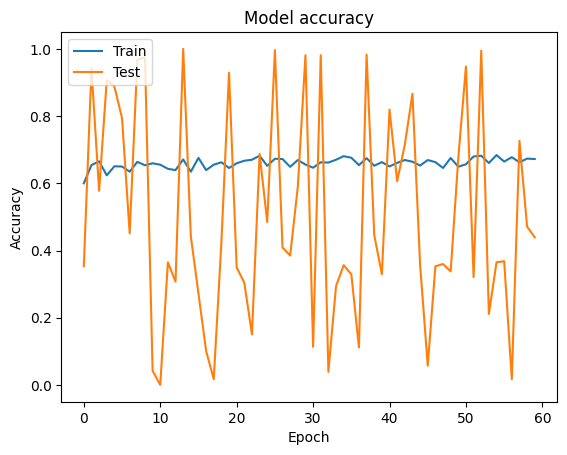

In [398]:
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

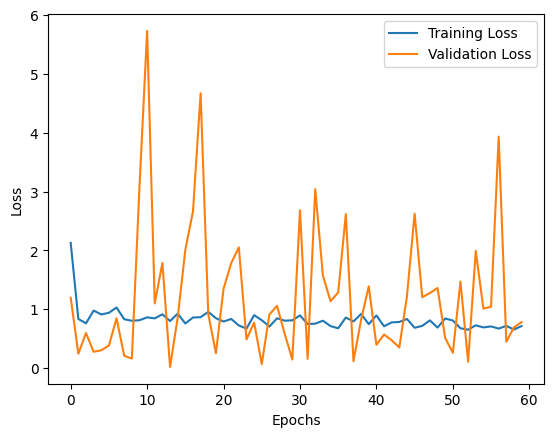

In [399]:
# Plot the training and validation loss
plt.plot(history1.history['loss'], label='train')   # Training loss
plt.plot(history1.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [401]:
# Predict the classes on the test set
y1_pred = model_1.predict(X_test)
y1_pred_classes = np.argmax(y1_pred, axis=1)

13/13 [==============================] - 0s 4ms/step


Text(70.72222222222221, 0.5, 'True labels')

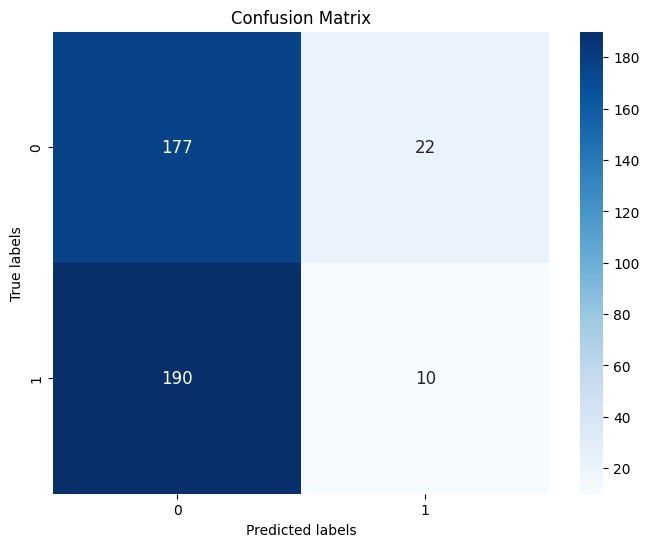

In [402]:
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y1_pred_classes)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

Text(70.72222222222221, 0.5, 'True labels')

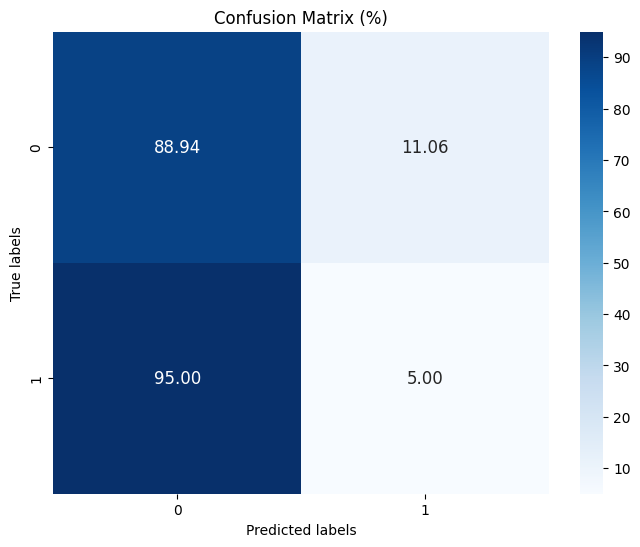

In [403]:
# Calculating percentages for each cell
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [404]:
# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y1_pred_classes))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.89      0.63       199
         1.0       0.31      0.05      0.09       200

    accuracy                           0.47       399
   macro avg       0.40      0.47      0.36       399
weighted avg       0.40      0.47      0.36       399



In [387]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [407]:
kf = KFold(n_splits=5,random_state=76,shuffle=True)
scores = []
Acc = []
X=data_matrix
y=labels
for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X[train_index], X[test_index]
    y_train_kf, y_test_kf = y[train_index], y[test_index]
    # Convert labels to categorical one-hot encoding
    y_train_kf1 = to_categorical(y_train_kf, num_classes=4)
    y_test_kf1 = to_categorical(y_test_kf, num_classes=4)
    model = create_model()
    model.compile(optimizer='adam',loss='CategoricalCrossentropy',metrics=['accuracy'])
    history = model.fit(X_train_kf, y_train_kf1, validation_split=0.2, epochs=60, batch_size=10, verbose=0)

    #Evaluate the model
    loss = model.evaluate(X_test_kf , y_test_kf1)

    # Plot the training and validation loss
    plt.plot(history.history['loss'], label='train')   # Training loss
    plt.plot(history.history['val_loss'], label='val')  # Validation loss

    plt.legend(['Training Loss', 'Validation Loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Predict the classes on the test set
    y_pred = model.predict(X_test_kf)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculating confusion matrix
    cf_matrix = confusion_matrix(y_test_kf, y_pred_classes)

    # Plotting confusion matrix as a heatmap with fitted text
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

    # Get the axis to modify layout
    plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    # Calculating percentages for each cell
    cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Plotting confusion matrix as a heatmap with percentages
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

    # Get the axis to modify layout
    plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
    plt.title('Confusion Matrix (%)')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    # Printing classification report
    print("Classification Report:")
    print(classification_report(y_test_kf, y_pred_classes))

    Acc.append(accuracy_score(y_test_kf, y_pred_classes))

print(f"Mean accuracy: {np.mean(Acc):.2f} ± {np.std(Acc):.2f}")
Acc = np.array(Acc)
print(Acc)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_11" is incompatible with the layer: expected shape=(None, 9), found shape=(10, 16)
